In [1]:
import numpy as np
import gvar as gv
import lsqfit
import sys
import os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import time
from importlib import reload

sys.path.append("../")
from fitter import data_loader as dl
from fitter import misc as ms
from fitter import model_average as md
from fitter import fitter as fit

for j in range(10): # Sometimes this needs to be loaded twice...
    matplotlib.rcParams['figure.figsize'] = [10, 10]

In [115]:
reload(fit)
reload(dl)
reload(ms)
reload(md)

<module 'fitter.model_average' from '../fitter/model_average.py'>

In [116]:
data_loader = dl.data_loader()
fit_results = data_loader.get_fit_info('fit_results.csv')
other_results = data_loader.get_fit_info('other_results.csv')

In [117]:
model_average = md.model_average(fit_results)

In [118]:
model_average.average()

1.1805(55)

In [119]:
model_average.average(split_unc=True)

[1.1805406953564923, 0.003484758503436459, 0.004207173195995736]

In [120]:
model_average.average(split_unc=True, param='delta_su2')

[-0.003816652813138851, 0.0006858935936365403, 0.00011855437690058301]

### Make plots

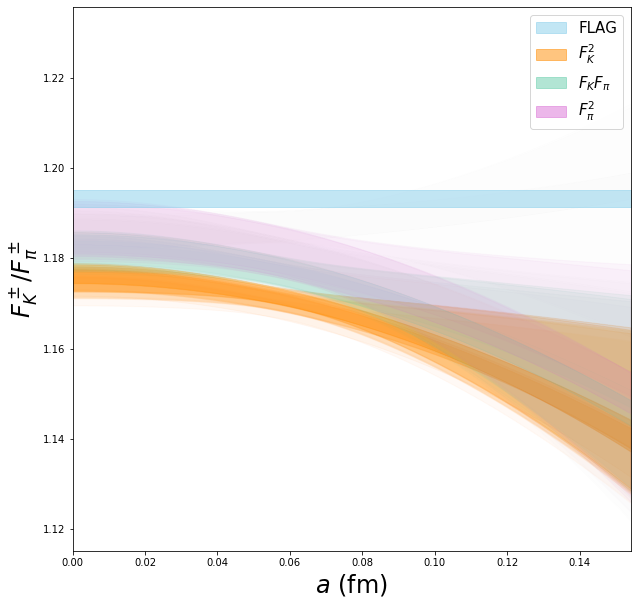

In [124]:
model_average.plot_fits('a')

In [37]:
model_average.plot_histogram('FK/Fpi');

In [38]:
model_average.plot_comparison(other_results=other_results, param='FK/Fpi_pm');